Keras_functional _api3

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
housing = fetch_california_housing()

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train[:,-6:].shape

(11610, 6)

In [ ]:
inputA = keras.layers.Input(shape=X_train[:,:5].shape[1])#first 5
inputB = keras.layers.Input(shape=X_train[:,-6:].shape[1]) # last 6
hidden1 = keras.layers.Dense(30, activation="relu")(inputA)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([inputB, hidden2])
output1 = keras.layers.Dense(1)(concat)
output2 = keras.layers.Dense(1)(hidden2)
model = keras.Model(inputs=[inputA,inputB], outputs=[output1,output2])

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 5)]                  0         []                            
                                                                                                  
 dense (Dense)               (None, 30)                   180       ['input_1[0][0]']             
                                                                                                  
 input_2 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 dense_1 (Dense)             (None, 30)                   930       ['dense[0][0]']               
                                                                                              

In [ ]:
model.compile(loss=["mse","mse"] , optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [ ]:
history= model.fit((X_train[:,:5],X_train[:,-6:]), y_train, epochs=40,validation_data=((X_valid[:,:5],X_valid[:,-6:]), y_valid))

Epoch 1/40
363/363 [==============================] - 2s 3ms/step - loss: 3.7758 - dense_2_loss: 2.0102 - dense_3_loss: 1.7656 - val_loss: 1.5469 - val_dense_2_loss: 0.7680 - val_dense_3_loss: 0.7789
Epoch 2/40
363/363 [==============================] - 1s 3ms/step - loss: 1.5453 - dense_2_loss: 0.7719 - dense_3_loss: 0.7734 - val_loss: 1.3762 - val_dense_2_loss: 0.6762 - val_dense_3_loss: 0.7000
Epoch 3/40
363/363 [==============================] - 2s 6ms/step - loss: 1.4168 - dense_2_loss: 0.6954 - dense_3_loss: 0.7214 - val_loss: 1.2988 - val_dense_2_loss: 0.6351 - val_dense_3_loss: 0.6637
Epoch 4/40
363/363 [==============================] - 2s 6ms/step - loss: 1.3445 - dense_2_loss: 0.6549 - dense_3_loss: 0.6896 - val_loss: 1.2438 - val_dense_2_loss: 0.6049 - val_dense_3_loss: 0.6389
Epoch 5/40
363/363 [==============================] - 3s 9ms/step - loss: 1.2935 - dense_2_loss: 0.6266 - dense_3_loss: 0.6669 - val_loss: 1.1982 - val_dense_2_loss: 0.5804 - val_dense_3_loss: 0.6178


In [ ]:
mse_test = model.evaluate((X_test[:,:5],X_test[:,-6:]), [y_test, y_test])

162/162 [==============================] - 0s 2ms/step - loss: 0.9899 - dense_2_loss: 0.4630 - dense_3_loss: 0.5269


In [ ]:
mse_output1_test = mse_test[1]
mse_output2_test = mse_test[2]
print(f'Mean Squared Error for Output 1 on Test Set: {mse_output1_test}')
print(f'Mean Squared Error for Output 2 on Test Set: {mse_output2_test}')

Mean Squared Error for Output 1 on Test Set: 0.4629931151866913
Mean Squared Error for Output 2 on Test Set: 0.5268945097923279


In [ ]:
predictions = model.predict((X_test[:, :5], X_test[:, -6:]))

162/162 [==============================] - 0s 2ms/step


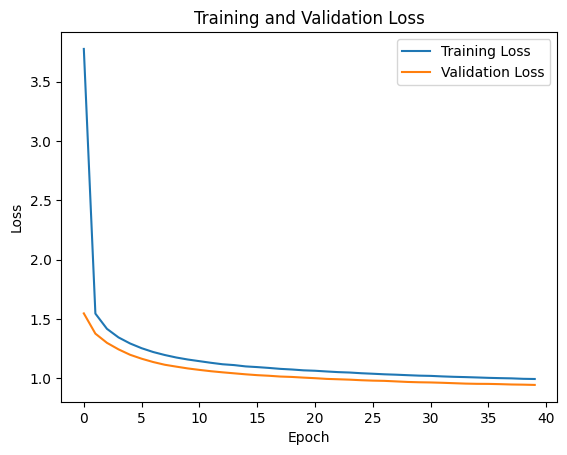

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
